# Importing Files

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns


# Reading the file

In [2]:
df = pd.read_csv('/Users/jannathshaik/Desktop/python/projects/flight_price_prediction/Clean_Dataset.csv')

In [3]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
df=df.drop('Unnamed: 0',axis=1) 
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


# Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [6]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [7]:
df.shape

(300153, 11)

# Data Preprocessing

In [8]:
#checking for missing values 
print(df.isnull().sum())


airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64


In [9]:
df.duplicated().sum()

0

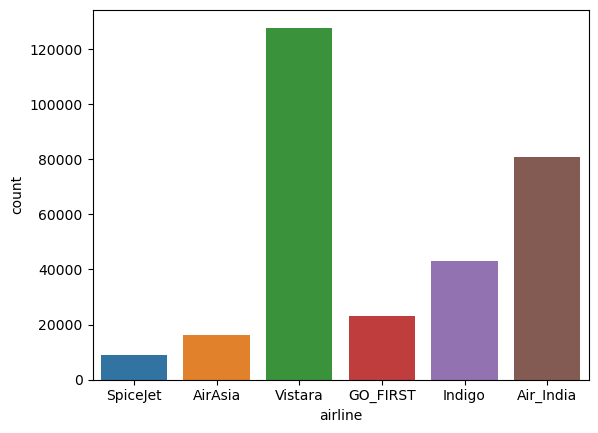

In [10]:
#COUNT OF AIRLINES BOOKED BY CUSTOMERS 

fig = sns.countplot(x=df.airline)
plt.show(fig)
plt.close('all')

#Vistara most popular, Spicejet least popular

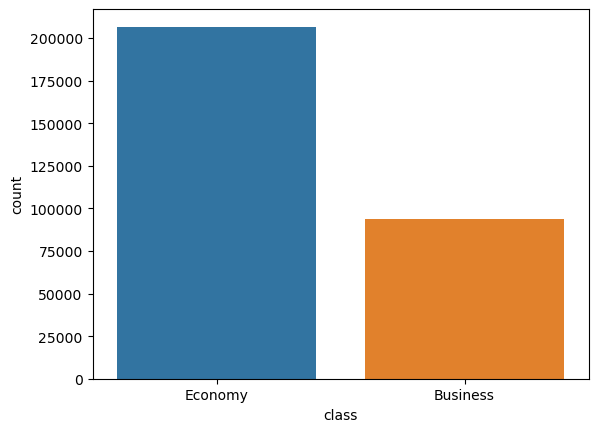

In [11]:
fig = sns.countplot(x= df['class'])
plt.show(fig)
plt.close('all')

#Majority use Economy 

In [12]:
src_dest_price = df.groupby(['source_city','destination_city'])['price'].mean().sort_values(ascending=True)
src_dest_price

source_city  destination_city
Hyderabad    Delhi               17243.945685
Delhi        Hyderabad           17347.288379
Bangalore    Delhi               17723.313972
Delhi        Bangalore           17880.216315
Mumbai       Delhi               18725.320008
Chennai      Delhi               18981.863948
Delhi        Mumbai              19355.829812
             Chennai             19369.881354
Kolkata      Delhi               19422.354559
Hyderabad    Mumbai              20080.865759
Delhi        Kolkata             20566.409418
Hyderabad    Kolkata             20823.893201
Mumbai       Hyderabad           21004.046705
Bangalore    Hyderabad           21226.121192
Hyderabad    Bangalore           21347.177998
Kolkata      Hyderabad           21500.011397
Chennai      Hyderabad           21591.345404
Hyderabad    Chennai             21848.065989
Kolkata      Mumbai              22078.883579
Mumbai       Kolkata             22379.146723
Chennai      Kolkata             22669.932407
Kolk

<Axes: xlabel='source_city,destination_city'>

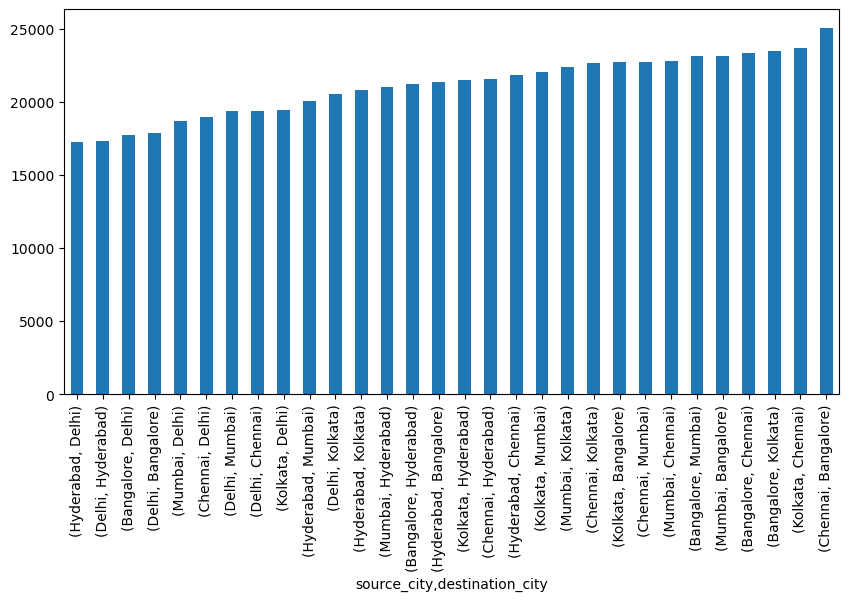

In [13]:
fig = plt.figure(figsize = (10, 5))
src_dest_price.plot(kind='bar')

In [14]:
days_left_price  = df.groupby(['days_left'])['price'].mean().reset_index()
days_left_price   

,days_left,price
0,1,21591.867151
1,2,30211.299801
2,3,28976.083569
3,4,25730.905653
4,5,26679.773368
5,6,24856.493902
6,7,25588.367351
7,8,24895.883995
8,9,25726.246072
9,10,25572.819134


<Axes: xlabel='days_left', ylabel='price'>

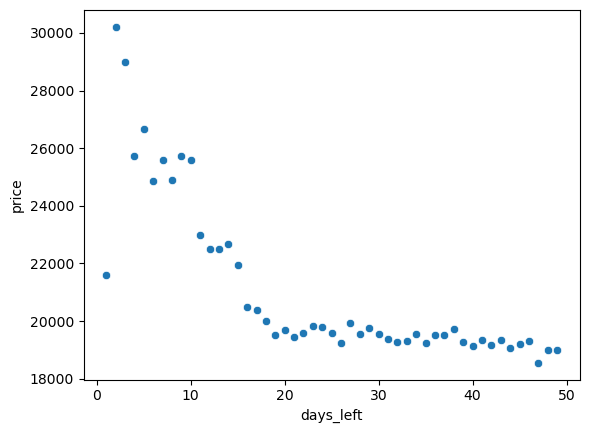

In [15]:
sns.scatterplot(x="days_left", y="price", data=days_left_price)
#As the days become lesser the prices increase 

In [16]:
dep_arr_price = df.groupby(['departure_time','arrival_time'])['price'].mean().reset_index()
dep_arr_price

,departure_time,arrival_time,price
0,Afternoon,Afternoon,14741.746011
1,Afternoon,Early_Morning,21159.511401
2,Afternoon,Evening,15548.836651
3,Afternoon,Late_Night,10811.615662
4,Afternoon,Morning,26056.580994
5,Afternoon,Night,19097.798757
6,Early_Morning,Afternoon,16564.731082
7,Early_Morning,Early_Morning,9540.191523
8,Early_Morning,Evening,24804.077441
9,Early_Morning,Late_Night,29638.037500


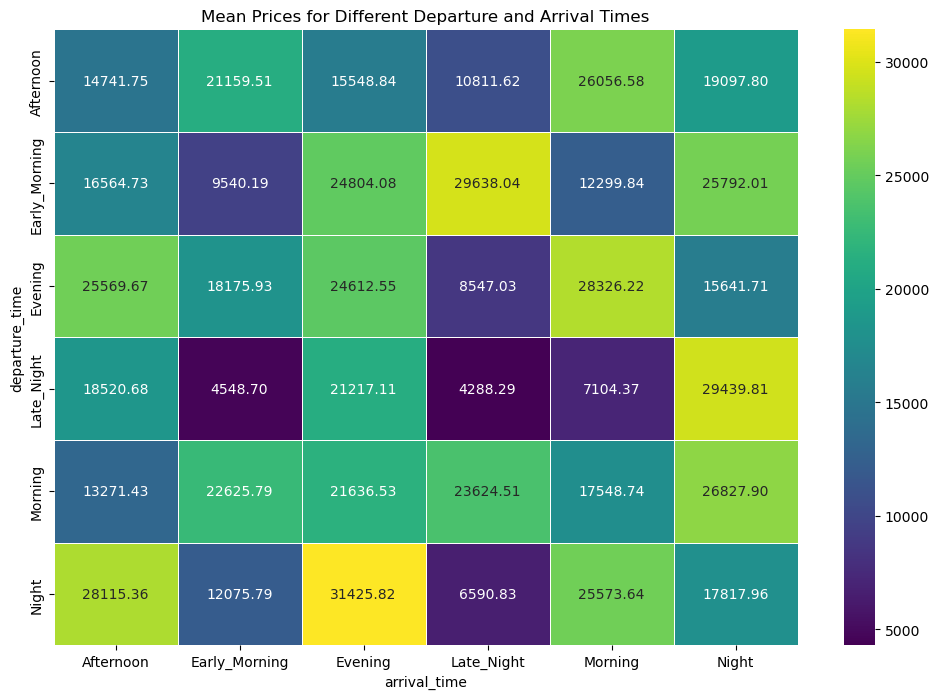

In [17]:

plt.figure(figsize=(12, 8))
heatmap_data = dep_arr_price.pivot_table(index='departure_time', columns='arrival_time', values='price', aggfunc='mean')
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".2f", linewidths=.5)
plt.title('Mean Prices for Different Departure and Arrival Times')
plt.show()


<Axes: xlabel='airline', ylabel='price'>

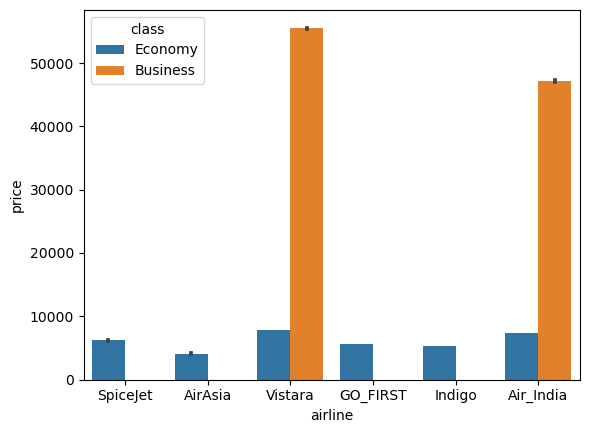

In [18]:
sns.barplot(x='airline',y='price',hue="class", data =df)

<Axes: ylabel='price'>

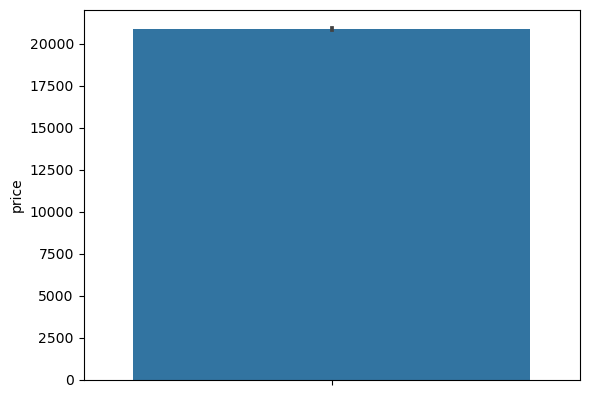

In [19]:
sns.barplot(data=df,y= 'price', hue='stops',)

## Encoding the features

In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

cat_cols = ['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']

# Copy the DataFrame
df_orginal = df.copy()

# Apply label encoding to the specified columns
df[cat_cols] = df[cat_cols].apply(le.fit_transform)


# Display unique encoded values for each categorical column for Data Preprocessing in the Model deployment stage.
for column in cat_cols:
    unique_encoded_values = df[column].unique()   
    print(f"Unique encoded values for column '{column}' {df_orginal[column].unique()} : {unique_encoded_values}")



Unique encoded values for column 'airline' ['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India'] : [4 0 5 2 3 1]
Unique encoded values for column 'flight' ['SG-8709' 'SG-8157' 'I5-764' ... '6E-7127' '6E-7259' 'AI-433'] : [1408 1387 1213 ...  558  587  718]
Unique encoded values for column 'source_city' ['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai'] : [2 5 0 4 3 1]
Unique encoded values for column 'departure_time' ['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night'] : [2 1 4 0 5 3]
Unique encoded values for column 'stops' ['zero' 'one' 'two_or_more'] : [2 0 1]
Unique encoded values for column 'arrival_time' ['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night'] : [5 4 1 0 2 3]
Unique encoded values for column 'destination_city' ['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi'] : [5 0 4 3 1 2]
Unique encoded values for column 'class' ['Economy' 'Business'] : [1 0]


In [21]:
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,1408,2,2,2,5,5,1,2.17,1,5953
1,4,1387,2,1,2,4,5,1,2.33,1,5953
2,0,1213,2,1,2,1,5,1,2.17,1,5956
3,5,1559,2,4,2,0,5,1,2.25,1,5955
4,5,1549,2,4,2,4,5,1,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,5,1477,1,4,0,2,3,0,10.08,49,69265
300149,5,1481,1,0,0,5,3,0,10.42,49,77105
300150,5,1486,1,1,0,5,3,0,13.83,49,79099
300151,5,1483,1,1,0,2,3,0,10.00,49,81585


In [22]:
df.dtypes

airline               int64
flight                int64
source_city           int64
departure_time        int64
stops                 int64
arrival_time          int64
destination_city      int64
class                 int64
duration            float64
days_left             int64
price                 int64
dtype: object

## Feature Selction

In [23]:
df.corr()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
airline,1.000000,0.637918,-0.028350,0.056885,-0.029838,0.037714,-0.030172,-0.178862,-0.001651,-0.010678,0.243358
flight,0.637918,1.000000,-0.009443,0.071564,-0.118833,0.067175,-0.036248,-0.259531,0.205502,-0.000443,0.305872
source_city,-0.028350,-0.009443,1.000000,-0.004688,0.001819,0.044153,-0.222935,0.000075,0.008619,-0.003568,0.004594
departure_time,0.056885,0.071564,-0.004688,1.000000,-0.008518,-0.046282,-0.001761,-0.053340,0.084348,-0.001597,0.058319
stops,-0.029838,-0.118833,0.001819,-0.008518,1.000000,0.010515,-0.012846,0.100262,-0.473860,-0.007047,-0.202620
arrival_time,0.037714,0.067175,0.044153,-0.046282,0.010515,1.000000,-0.037431,-0.027647,0.008679,-0.004191,0.042043
destination_city,-0.030172,-0.036248,-0.222935,-0.001761,-0.012846,-0.037431,1.000000,0.001603,0.001736,-0.005323,0.004795
class,-0.178862,-0.259531,0.000075,-0.053340,0.100262,-0.027647,0.001603,1.000000,-0.138710,0.013039,-0.937860
duration,-0.001651,0.205502,0.008619,0.084348,-0.473860,0.008679,0.001736,-0.138710,1.000000,-0.039157,0.204222
days_left,-0.010678,-0.000443,-0.003568,-0.001597,-0.007047,-0.004191,-0.005323,0.013039,-0.039157,1.000000,-0.091949


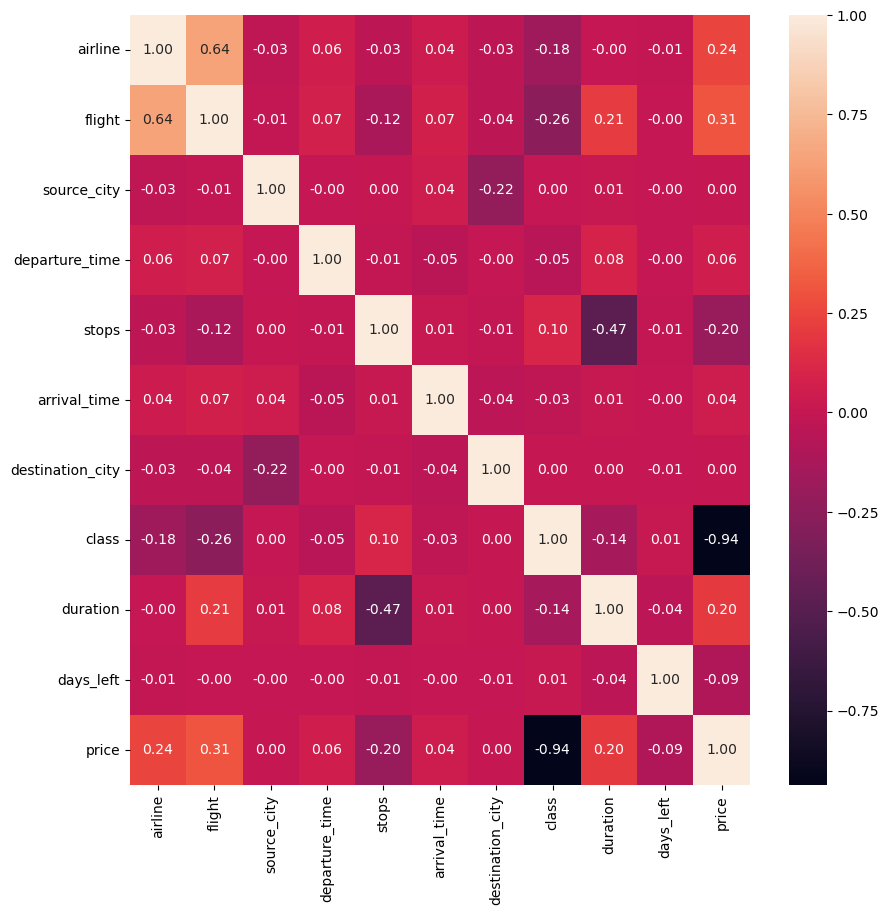

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot = True, fmt=".2f")
plt.show()

In [25]:
df.drop('flight', axis = 1, inplace= True) #flight and airline have high correlation 
df.drop(['source_city','destination_city'],axis = 1, inplace= True) ##have zero correlation with the target variable

In [26]:
df

,airline,departure_time,stops,arrival_time,class,duration,days_left,price
0,4,2,2,5,1,2.17,1,5953
1,4,1,2,4,1,2.33,1,5953
2,0,1,2,1,1,2.17,1,5956
3,5,4,2,0,1,2.25,1,5955
4,5,4,2,4,1,2.33,1,5955
...,...,...,...,...,...,...,...,...
300148,5,4,0,2,0,10.08,49,69265
300149,5,0,0,5,0,10.42,49,77105
300150,5,1,0,5,0,13.83,49,79099
300151,5,1,0,2,0,10.00,49,81585


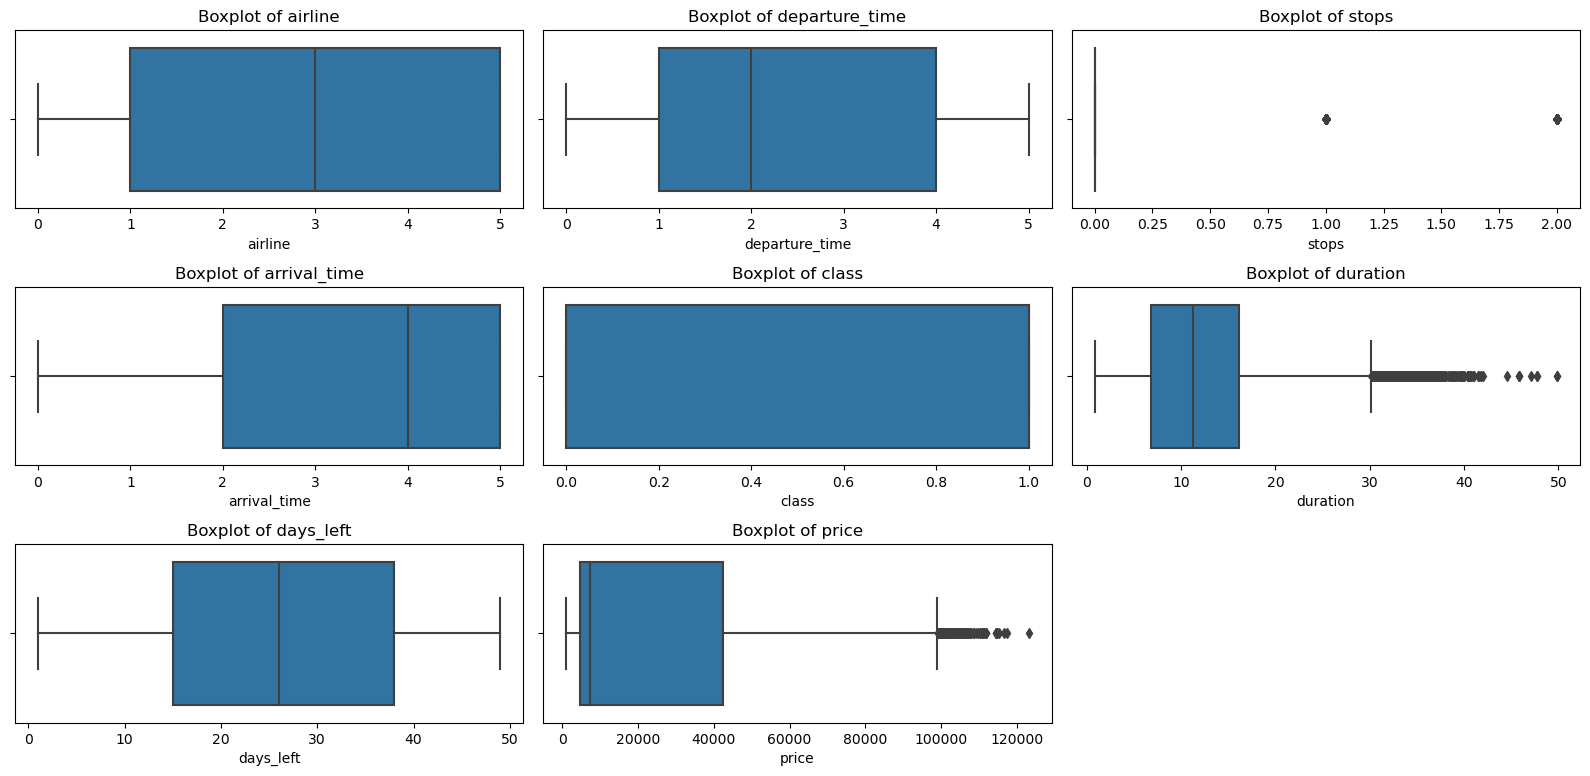

In [27]:


# Specify the columns you want to include in the boxplot
columns_to_plot = ['airline','departure_time', 'stops', 'arrival_time','class', 'duration', 'days_left', 'price']

# Set up the figure and axis
plt.figure(figsize=(16, 10))

# Iterate through the specified columns and create individual boxplots
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(4, 3, i)  # Adjust the subplot grid as needed
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()



In [28]:


# Assuming 'df' is your dataset, a Pandas DataFrame
columns_to_plot =['airline','departure_time', 'stops', 'arrival_time','class', 'duration', 'days_left']

# Set up the figure and axis
plt.figure(figsize=(16, 10))

# Iterate through the specified columns and create individual boxplots
for i, column in enumerate(columns_to_plot, 1):

    # Identify and remove outliers using the IQR method
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out rows outside the IQR bounds
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Adjust layout and show the plot
plt.tight_layout()
plt.show()



<Figure size 1600x1000 with 0 Axes>

In [29]:
df.shape

(249567, 8)

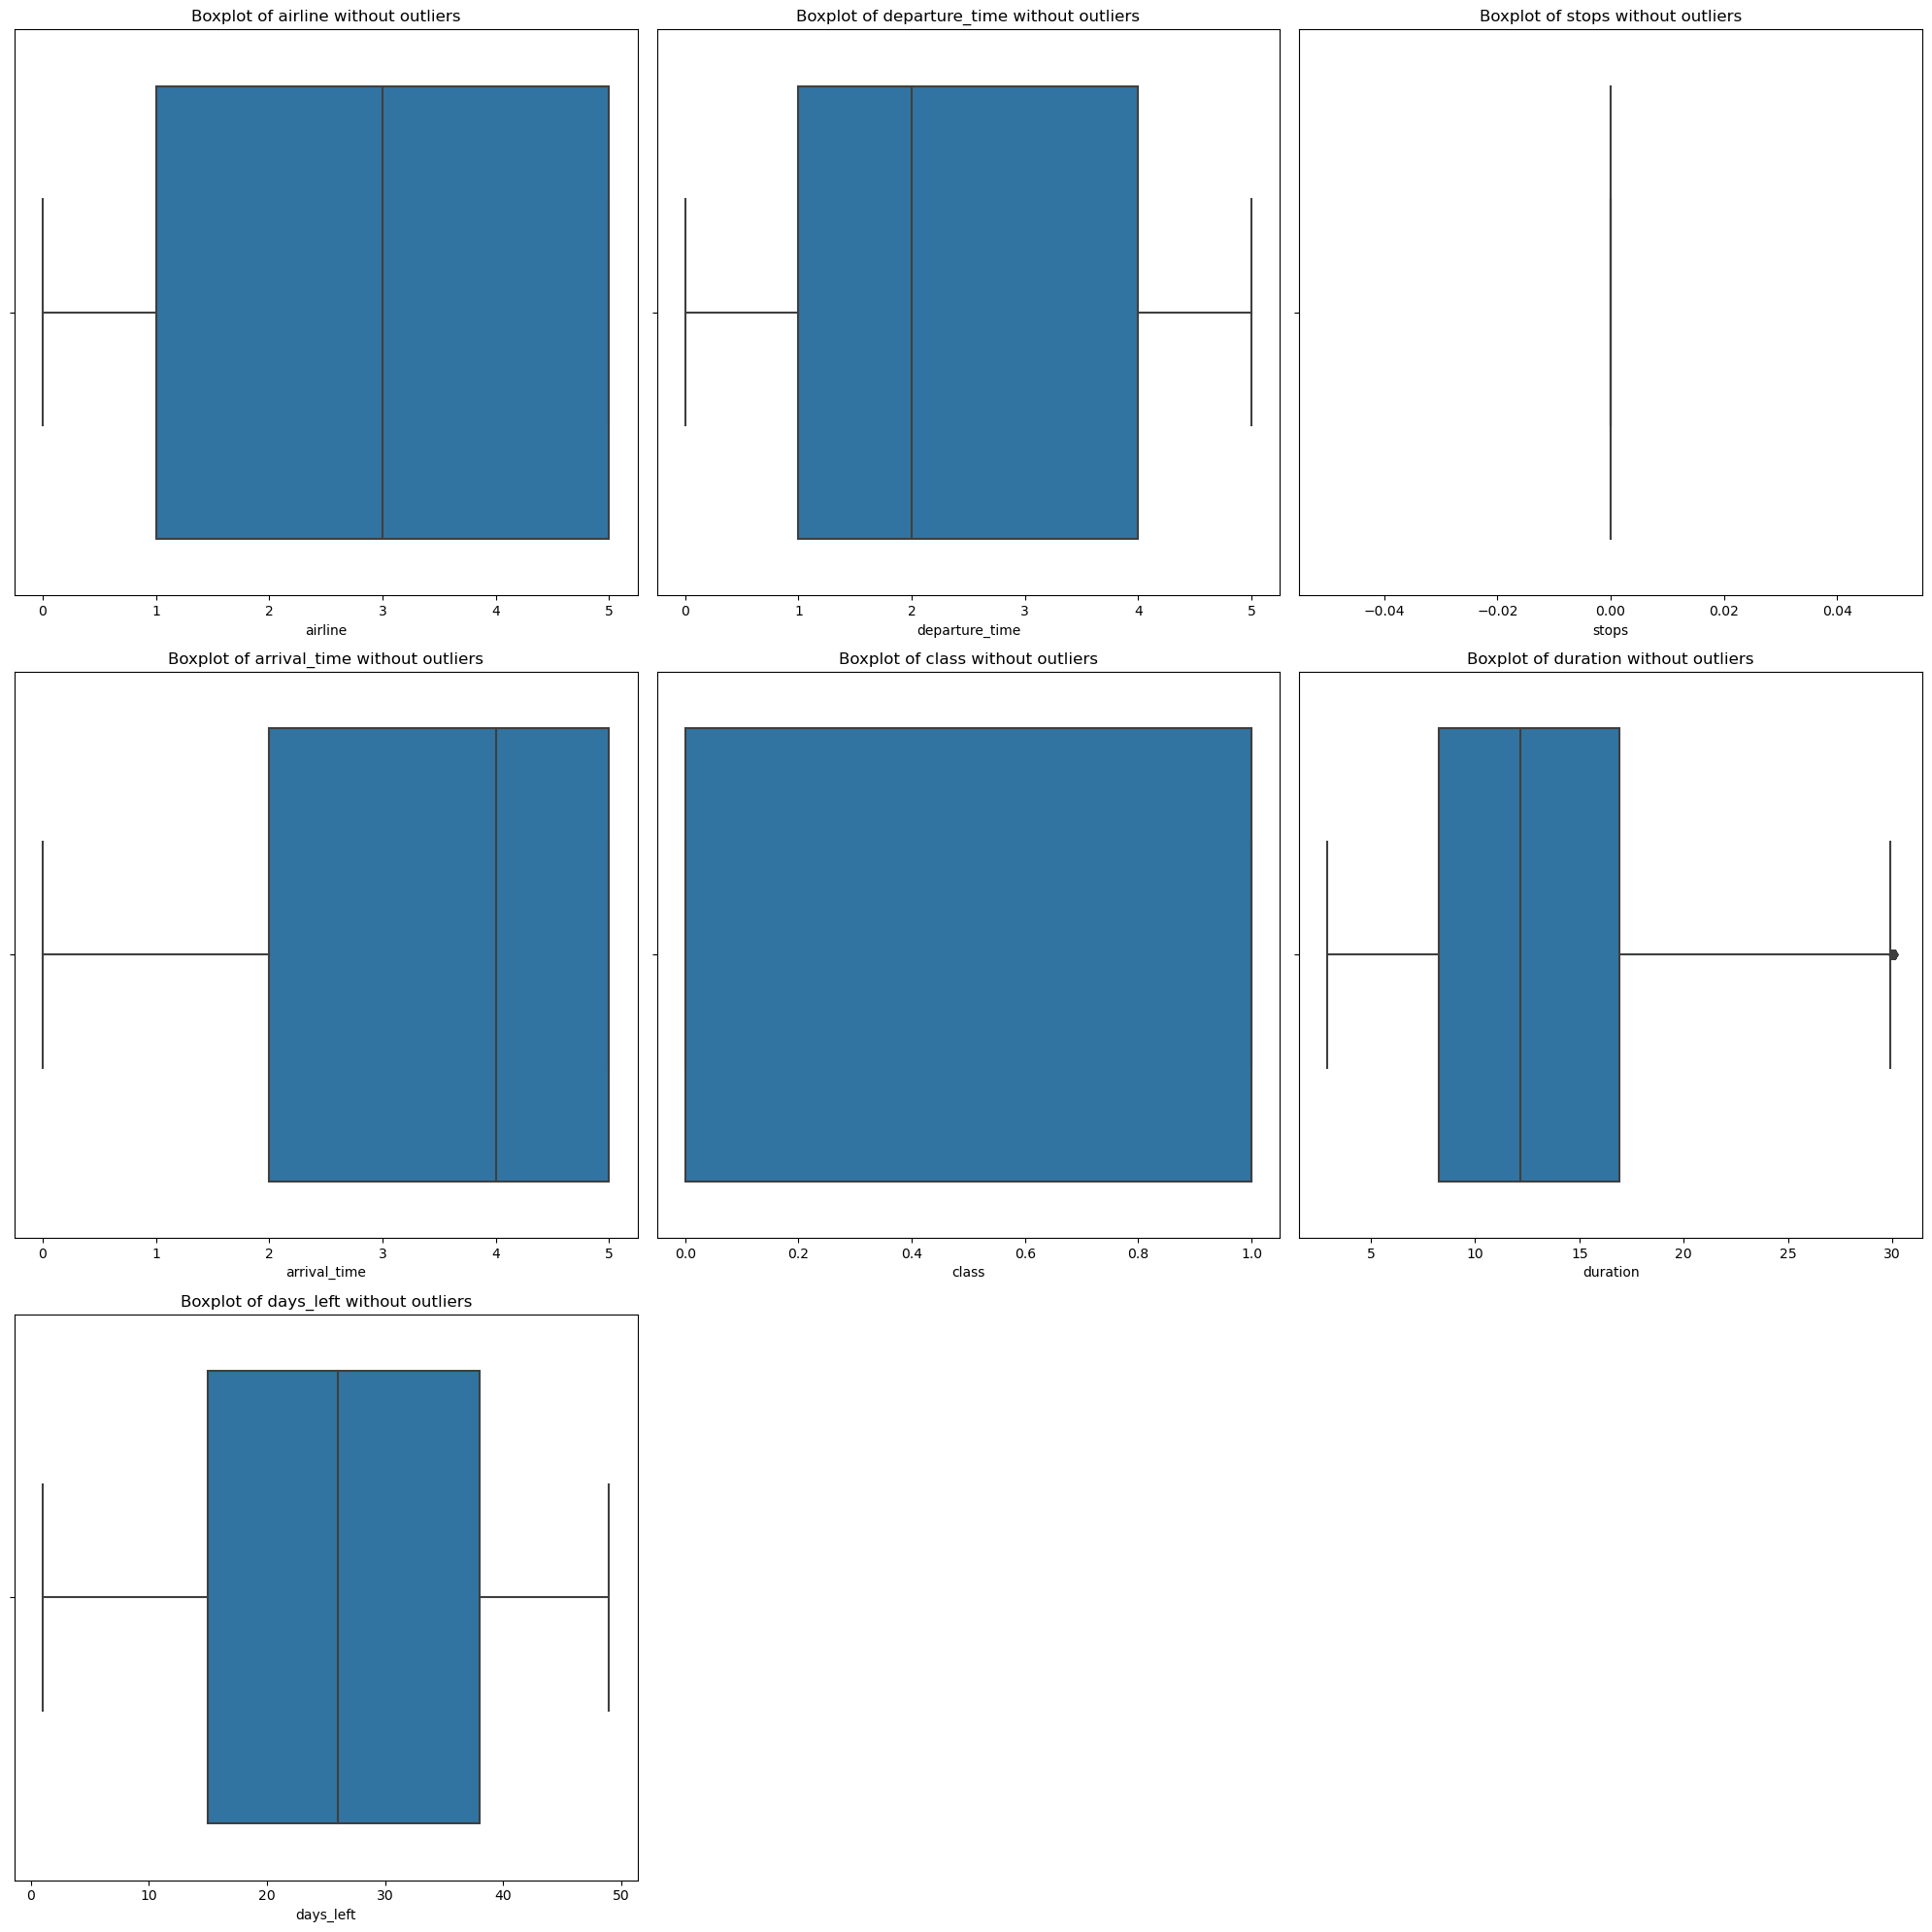

In [30]:


# Assuming 'df' is your dataset, a Pandas DataFrame
columns_to_plot = ['airline','departure_time', 'stops', 'arrival_time','class', 'duration', 'days_left']

# Set up the figure and axis
plt.figure(figsize=(20,20))

# Iterate through the specified columns and create individual boxplots
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)  # Adjust the subplot grid as needed

    # Plot boxplot after removing outliers
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column} without outliers')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


## Scaling the features

In [31]:
from sklearn.preprocessing import MinMaxScaler

# Custom new minimum and maximum values
new_min = 0
new_max = 1  # Set your desired maximum value

duration_min = df['duration'].min()
duration_max = df['duration'].max()
days_left_min = df['days_left'].min()
days_left_max = df['days_left'].max()
price_min = df['price'].min()
price_max = df['price'].max()

In [32]:

scaler = MinMaxScaler(feature_range=(new_min, new_max))

scale_cols = ['airline','departure_time', 'stops', 'arrival_time','class', 'duration', 'days_left', 'price']


df[scale_cols] = scaler.fit_transform(df[scale_cols])

df

,airline,departure_time,stops,arrival_time,class,duration,days_left,price
18,0.0,0.4,0.0,0.2,1.0,0.343520,0.0,0.039716
19,0.0,0.4,0.0,0.8,1.0,0.493741,0.0,0.039716
20,0.4,0.2,0.0,0.4,1.0,0.325110,0.0,0.039757
21,0.4,0.2,0.0,1.0,1.0,0.426362,0.0,0.039757
22,0.4,0.4,0.0,0.8,1.0,0.469440,0.0,0.039757
...,...,...,...,...,...,...,...,...
300148,1.0,0.8,0.0,0.4,0.0,0.263623,1.0,0.558844
300149,1.0,0.0,0.0,1.0,0.0,0.276141,1.0,0.623124
300150,1.0,0.2,0.0,1.0,0.0,0.401694,1.0,0.639473
300151,1.0,0.2,0.0,0.4,0.0,0.260677,1.0,0.659856


# Splitting the data into train and test split

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error ,r2_score
X = df[['airline','departure_time', 'stops', 'arrival_time','class', 'duration', 'days_left']]
Y = df['price']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, test_size = 0.2, random_state = 7)

# Model

## Linear Regression

In [34]:
#Linear Regression Model
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

linear_model.fit(X_train, Y_train)

Y1_pred = linear_model.predict(X_test)

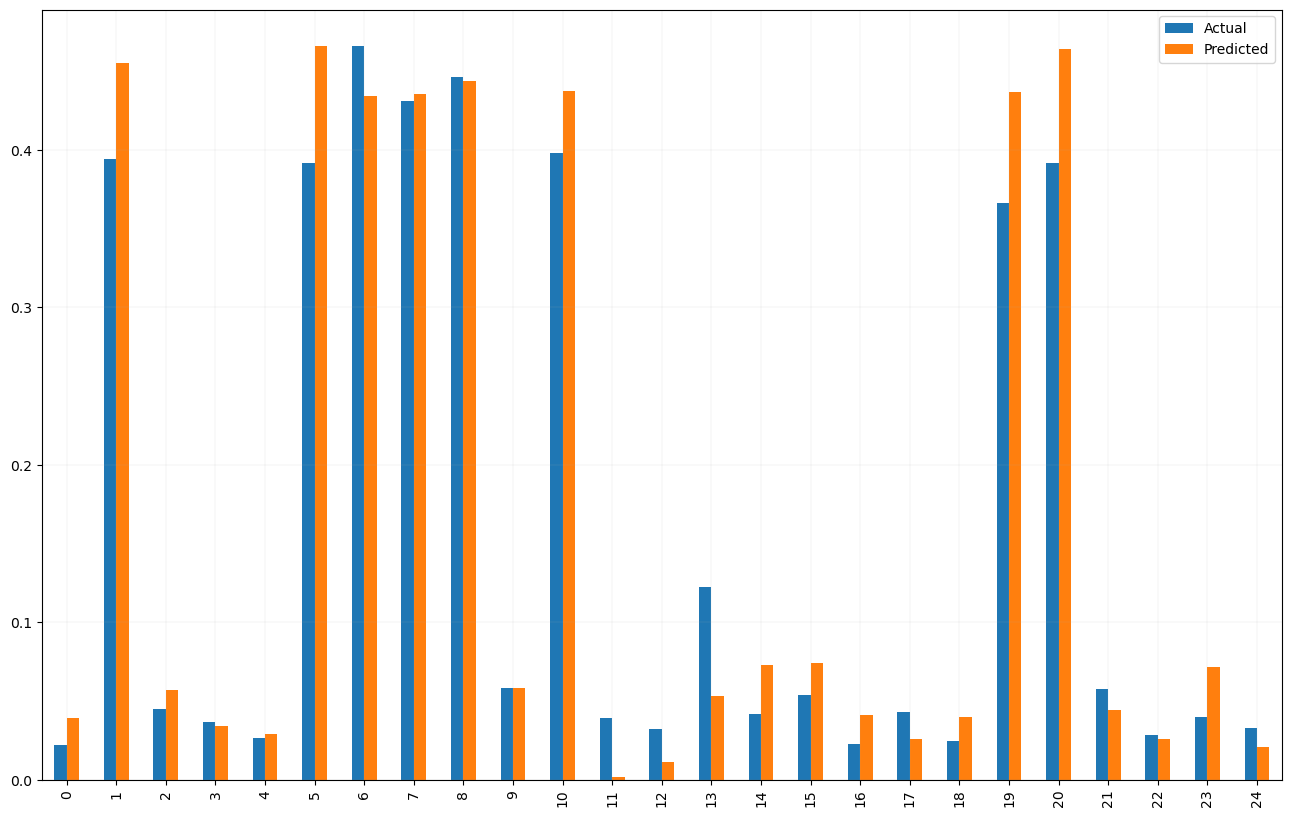

In [35]:
df_lr = pd.DataFrame({'Actual': Y_test.to_numpy().flatten(), 'Predicted': Y1_pred.flatten()})



df1 = df_lr.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.1')
plt.grid(which='minor', linestyle=':', linewidth='0.1')
plt.show()

In [36]:

MSE_LR=mean_squared_error(Y_test, Y1_pred)
print("MSE: ", mean_squared_error(Y_test, Y1_pred))

RMSE_LR =np.sqrt(mean_squared_error(Y_test, Y1_pred))
print("RMSE: ", np.sqrt(mean_squared_error(Y_test, Y1_pred)))

MAE_LR =np.sqrt(mean_absolute_error(Y_test, Y1_pred))
print("MAE: ", np.sqrt(mean_absolute_error(Y_test, Y1_pred)))
               
R2_LR =r2_score(Y_test, Y1_pred)
print("R2 Score: ", r2_score(Y_test, Y1_pred))

MSE:  0.0026913042290183623
RMSE:  0.05187778165089909
MAE:  0.1833486678119886
R2 Score:  0.9284446763078452


## Random Forest

In [37]:
#Random Forest Model 
from sklearn.ensemble import RandomForestRegressor 
randomforest_model= RandomForestRegressor(n_estimators= 200, random_state= 0) 

randomforest_model.fit(X_train,Y_train) 

Y2_pred = randomforest_model.predict(X_test)

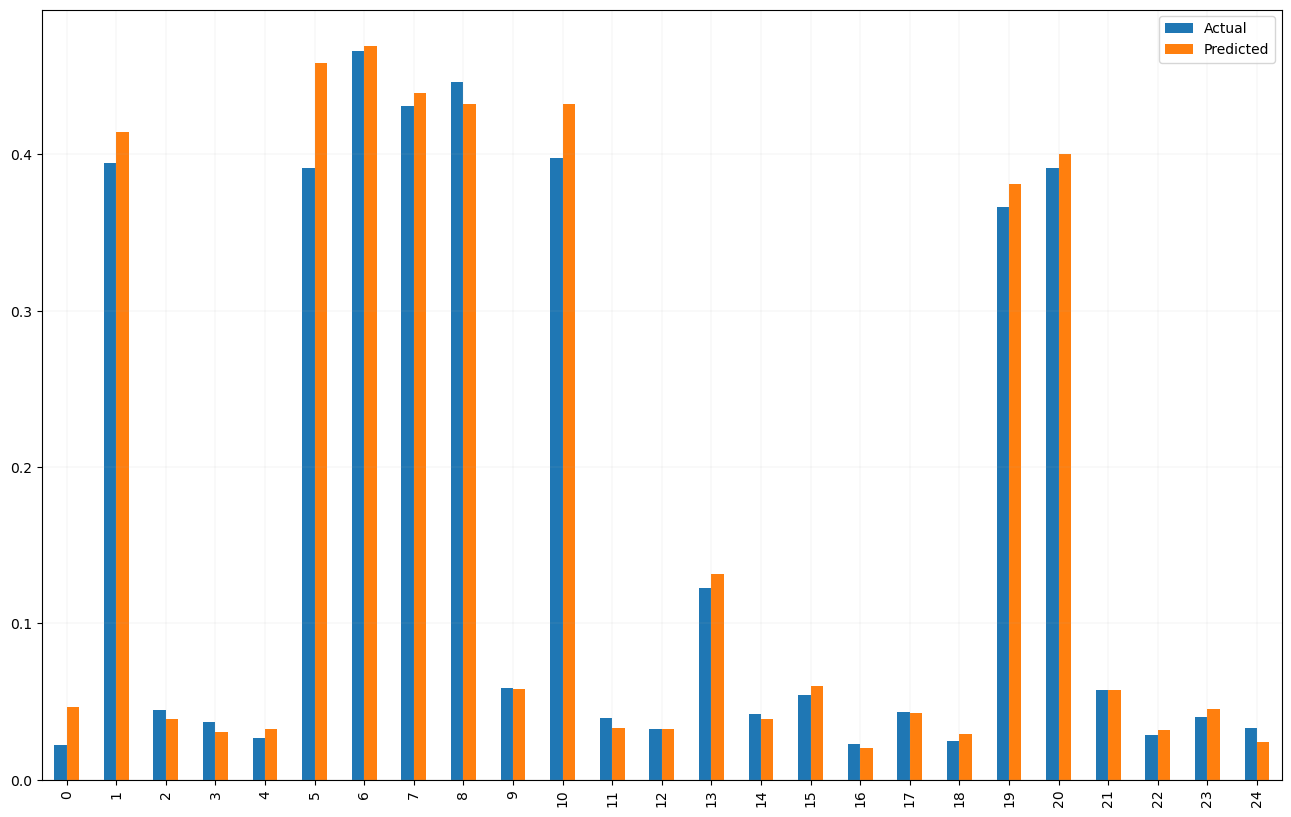

In [ ]:
df_rfr = pd.DataFrame({'Actual': Y_test.to_numpy().flatten(), 'Predicted': Y2_pred.flatten()})



df2 = df_rfr.head(25)
df2.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.1')
plt.grid(which='minor', linestyle=':', linewidth='0.1')
plt.show()

In [ ]:
MSE_RFR=mean_squared_error(Y_test, Y2_pred)
print("MSE: ", mean_squared_error(Y_test, Y2_pred))

RMSE_RFR=np.sqrt(mean_squared_error(Y_test, Y2_pred))
print("RMSE: ", np.sqrt(mean_squared_error(Y_test, Y2_pred)))

MAE_RFR=np.sqrt(mean_absolute_error(Y_test, Y2_pred))
print("MAE: ", np.sqrt(mean_absolute_error(Y_test, Y2_pred)))
               
R2_RFR=r2_score(Y_test, Y2_pred)
print("R2 Score: ", r2_score(Y_test, Y2_pred))

MSE:  0.0017395076515233665
RMSE:  0.041707405236041314
MAE:  0.14845066033148582
R2 Score:  0.9537506641844298


## Decision Trees

In [ ]:
#Decision Trees Model 
from sklearn.tree import DecisionTreeRegressor
decisiontree_model = DecisionTreeRegressor(random_state=0)

decisiontree_model.fit(X_train, Y_train)
Y4_pred = decisiontree_model.predict(X_test)


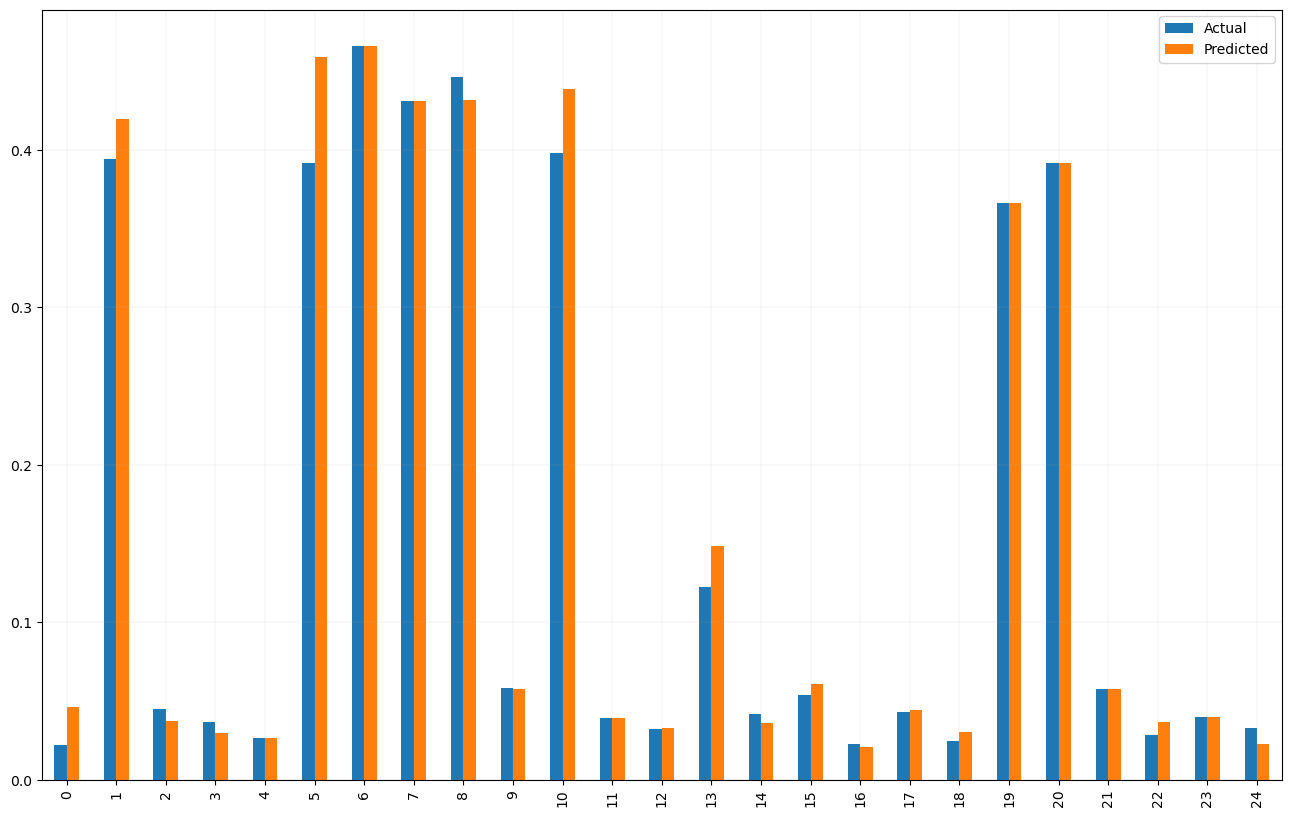

In [ ]:
df_dtr = pd.DataFrame({'Actual': Y_test.to_numpy().flatten(), 'Predicted': Y4_pred.flatten()})



df4 = df_dtr.head(25)
df4.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.1')
plt.grid(which='minor', linestyle=':', linewidth='0.1')
plt.show()

In [ ]:
MSE_DTR=mean_squared_error(Y_test, Y4_pred)
print("MSE: ", mean_squared_error(Y_test, Y4_pred))

RMSE_DTR=np.sqrt(mean_squared_error(Y_test, Y4_pred))
print("RMSE: ", np.sqrt(mean_squared_error(Y_test, Y4_pred)))

MAE_DTR=np.sqrt(mean_absolute_error(Y_test, Y4_pred))
print("MAE: ", np.sqrt(mean_absolute_error(Y_test, Y4_pred)))
               
R2_DTR=r2_score(Y_test, Y4_pred)
print("R2 Score: ", r2_score(Y_test, Y4_pred))

MSE:  0.002284908662102705
RMSE:  0.04780071821743587
MAE:  0.1565626350026171
R2 Score:  0.9392497595920614


## K-Nearest Neighbour

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=20)  # You can adjust the number of neighbors (n_neighbors) as needed

knn_model.fit(X_train, Y_train)

Y5_pred = knn_model.predict(X_test)

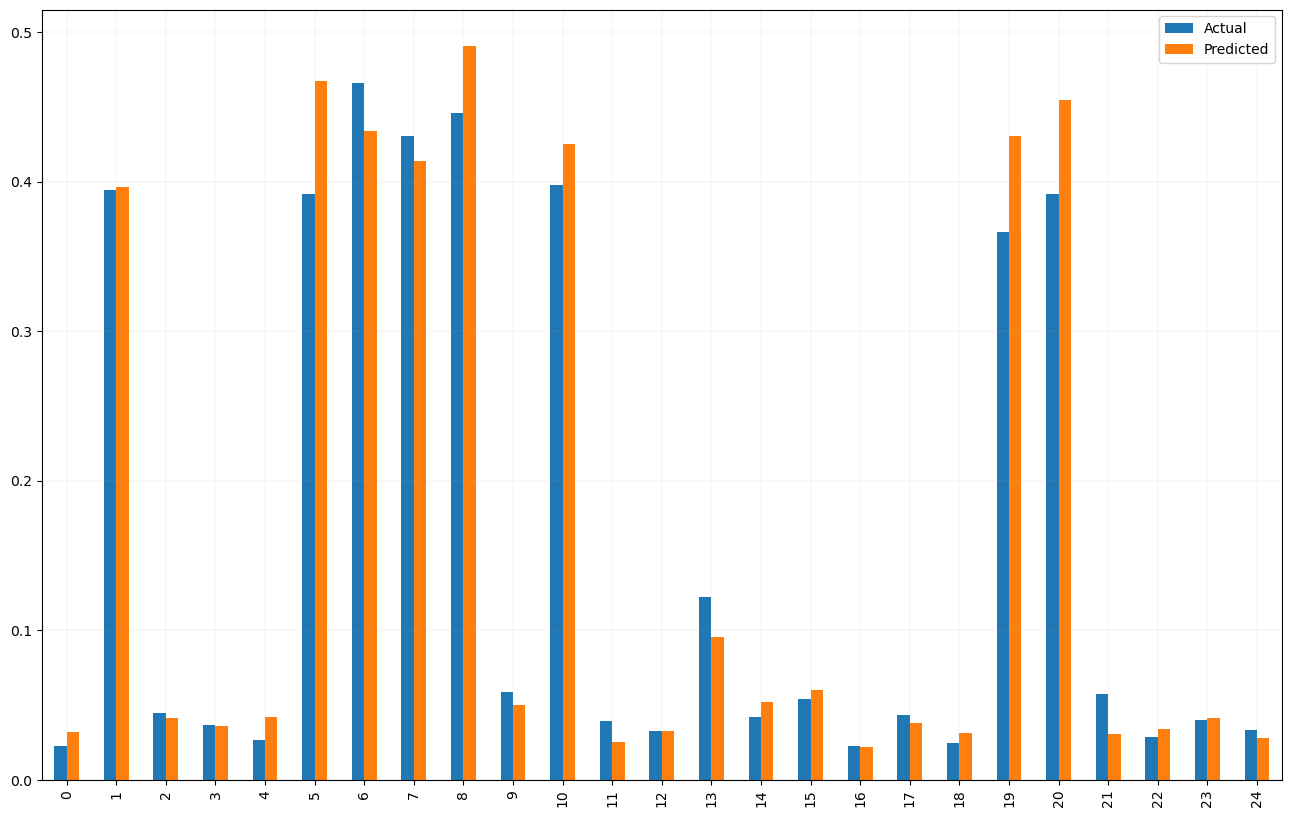

In [ ]:
df_knn = pd.DataFrame({'Actual': Y_test.to_numpy().flatten(), 'Predicted': Y5_pred.flatten()})



df5 = df_knn.head(25)
df5.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.1')
plt.grid(which='minor', linestyle=':', linewidth='0.1')
plt.show()

In [ ]:
MSE_KNN=mean_squared_error(Y_test, Y5_pred)
print("MSE: ", mean_squared_error(Y_test, Y5_pred))

# RMSE

RMSE_KNN=np.sqrt(mean_squared_error(Y_test, Y5_pred))
print("RMSE: ", np.sqrt(mean_squared_error(Y_test, Y5_pred)))

# MAE

MAE_KNN=np.sqrt(mean_absolute_error(Y_test, Y5_pred))
print("MAE: ", np.sqrt(mean_absolute_error(Y_test, Y5_pred)))
      
# R2 Score
               
R2_KNN=r2_score(Y_test, Y5_pred)
print("R2 Score: ", r2_score(Y_test, Y5_pred))

MSE:  0.0019633958382163645
RMSE:  0.0443102227281286
MAE:  0.16243179062115684
R2 Score:  0.9477980143513374


## XGBoost 

In [ ]:
#XGBoost Model
from xgboost import XGBRegressor
xgboost_model = XGBRegressor(n_estimators=250, random_state=0)
xgboost_model.fit(X_train,Y_train) 
Y3_pred = xgboost_model.predict(X_test)


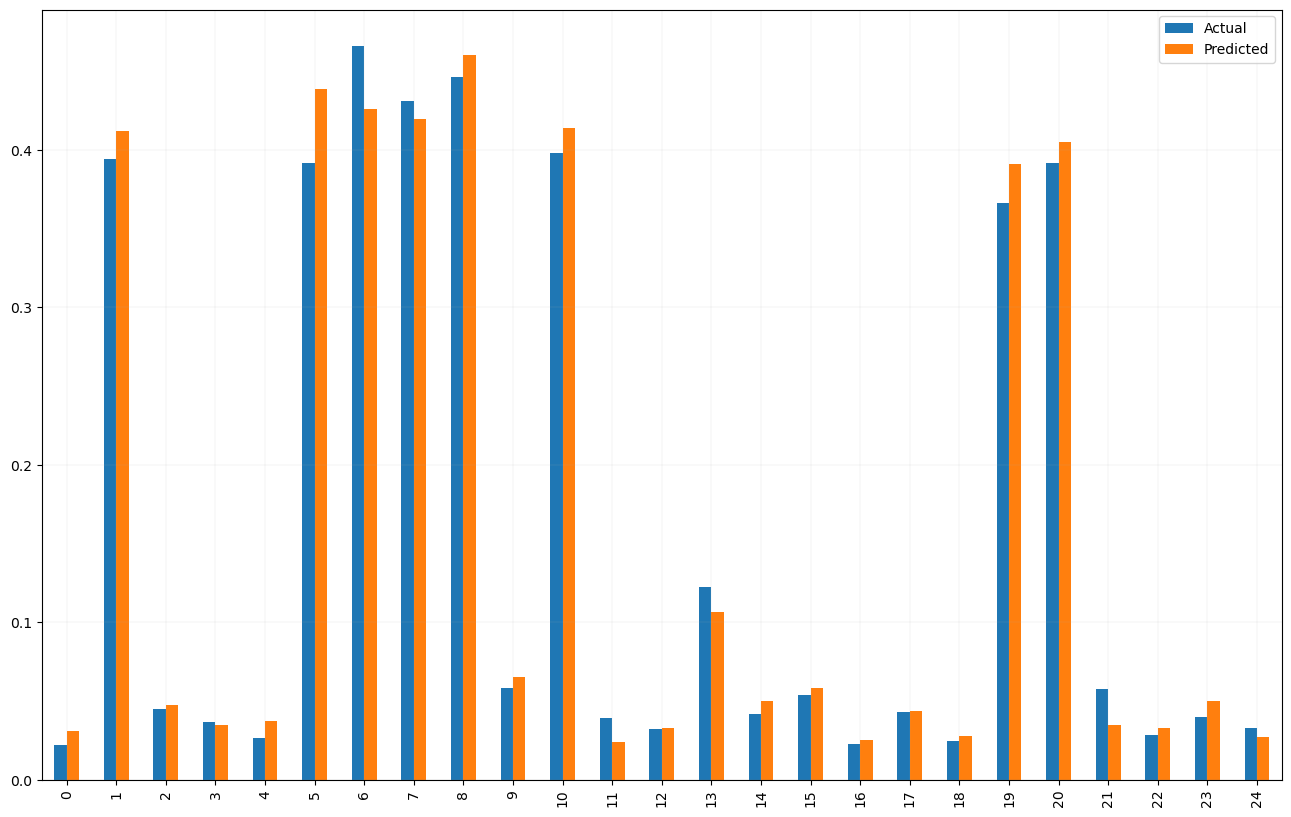

In [ ]:
df_xgb = pd.DataFrame({'Actual': Y_test.to_numpy().flatten(), 'Predicted': Y3_pred.flatten()})



df3 = df_xgb.head(25)
df3.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.1')
plt.grid(which='minor', linestyle=':', linewidth='0.1')
plt.show()

In [ ]:
MSE_XGB=mean_squared_error(Y_test, Y3_pred)
print("MSE: ", mean_squared_error(Y_test, Y3_pred))

RMSE_XGB=np.sqrt(mean_squared_error(Y_test, Y3_pred))
print("RMSE: ", np.sqrt(mean_squared_error(Y_test, Y3_pred)))

MAE_XGB =np.sqrt(mean_absolute_error(Y_test, Y3_pred))
print("MAE: ", np.sqrt(mean_absolute_error(Y_test, Y3_pred)))
               
R2_XGB =r2_score(Y_test, Y3_pred)
print("R2 Score: ", r2_score(Y_test, Y3_pred))

MSE:  0.001337597238982834
RMSE:  0.03657317649566187
MAE:  0.1466461326483154
R2 Score:  0.9644364979725611


#### Comparison
        before hyperparamter tuning

In [ ]:
# Define the models and their results
models = ["Linear Regression", "Decision Tree Regressor", "Random Forest Regressor","K Nearest Neighbour","XGBRegressor"]
MSE = [MSE_LR, MSE_DTR, MSE_RFR,MSE_KNN,MSE_XGB]
RMSE = [RMSE_LR, RMSE_DTR, RMSE_RFR,RMSE_KNN,RMSE_XGB]
MAE = [MAE_LR, MAE_DTR, MAE_RFR,MAE_KNN,MAE_XGB]
R2 = [R2_LR, R2_DTR, R2_RFR,R2_KNN,R2_XGB]

# Create a DataFrame to display the results with indexing starting from 1 and labeled as 'Model no.'
results = pd.DataFrame({
    'Model': models,
    'MSE': MSE,
    'RMSE': RMSE,
    'MAE': MAE,
    'R Squared': R2
}, index=range(1, len(models) + 1))  # Start indexing from 1

# Rename the index column to 'Model no.'
results.index.name = 'Model no.'

# Function to highlight minimum MSE, RMSE, MAE, and maximum R-squared values and make the font bold
def highlight_min_max(val):
    style = ''
    if isinstance(val, (int, float)):
        if val == results['MSE'].min():
            style += 'background-color: rgba(0, 128, 0, 0.3); color: black; font-weight: bold;'
        if val == results['RMSE'].min():
            style += 'background-color: rgba(0, 128, 0, 0.3); color: black; font-weight: bold;'
        if val == results['MAE'].min():
            style += 'background-color: rgba(0, 128, 0, 0.3); color: black; font-weight: bold;'
        if val == results['R Squared'].max():
            style += 'background-color: rgba(0, 0, 128, 0.3); color: white; font-weight: bold;'
    return style

# Apply the highlight_min_max function to the entire DataFrame
styled_results = results.style.applymap(highlight_min_max)

# Display the styled results DataFrame
styled_results

,Model,MSE,RMSE,MAE,R Squared
Model no.,,,,,
1,Linear Regression,0.002691,0.051878,0.183349,0.928445
2,Decision Tree Regressor,0.002285,0.047801,0.156563,0.939250
3,Random Forest Regressor,0.001740,0.041707,0.148451,0.953751
4,K Nearest Neighbour,0.001963,0.044310,0.162432,0.947798
5,XGBRegressor,0.001338,0.036573,0.146646,0.964436


### Hyperparameter Tuning
    To increase accuracy

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from math import sqrt
import numpy as np

xgboost_model_tune = XGBRegressor(random_state=0)


param_dist = {
    'n_estimators': [150, 200, 250, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2,0.25,0.3],
    'max_depth': [ 3, 4, 5, 6, 8, 10, 12, 15],
    'min_child_weight' : [ 1, 3, 5, 7 ],
    'gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
    'colsample_bytree': [ 0.3, 0.4, 0.5 , 0.7 ]
}

# Create RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgboost_model_tune,
    param_distributions=param_dist,
    n_iter=150,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit the model with the randomized search parameters
random_search.fit(X_train, Y_train)

# Get the best parameters from the random search
best_params = random_search.best_params_
best_params


Fitting 3 folds for each of 150 candidates, totalling 450 fits


{'n_estimators': 250,
 'min_child_weight': 3,
 'max_depth': 10,
 'learning_rate': 0.2,
 'gamma': 0.0,
 'colsample_bytree': 0.7}

In [ ]:
# Use the best parameters to create the final XGBoost model
final_xgboost_model = XGBRegressor(random_state=0, **best_params)

# Train the final model
final_xgboost_model.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = final_xgboost_model.predict(X_test)

# Evaluate the XGBoost model using various metrics
mse = mean_squared_error(Y_test, y_pred)
rmse = sqrt(mse)
mae = mean_absolute_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

# Print the evaluation metrics and best hyperparameters
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R2 Score: {r2}')
print(f'Best Hyperparameters: {best_params}')


MSE: 0.0013533612554268949
RMSE: 0.036788058598231234
MAE: 0.021611891887902294
R2 Score: 0.9640173705891978
Best Hyperparameters: {'n_estimators': 250, 'min_child_weight': 3, 'max_depth': 10, 'learning_rate': 0.2, 'gamma': 0.0, 'colsample_bytree': 0.7}


#### Comparison
        after hyperparameter tuning

In [ ]:
models = ["Linear Regression", "Decision Tree Regressor", "Random Forest Regressor","K Nearest Neighbour","XGBRegressor"]
MSE = [MSE_LR, MSE_DTR, MSE_RFR,MSE_KNN,mse]
RMSE = [RMSE_LR, RMSE_DTR, RMSE_RFR,RMSE_KNN,rmse]
MAE = [MAE_LR, MAE_DTR, MAE_RFR,MAE_KNN,mae]
R2 = [R2_LR, R2_DTR, R2_RFR,R2_KNN,r2]

# Create a DataFrame to display the results with indexing starting from 1 and labeled as 'Model no.'
results = pd.DataFrame({
    'Model': models,
    'MSE': MSE,
    'RMSE': RMSE,
    'MAE': MAE,
    'R Squared': R2
}, index=range(1, len(models) + 1))  # Start indexing from 1

# Rename the index column to 'Model no.'
results.index.name = 'Model no.'

# Function to highlight minimum MSE, RMSE, MAE, and maximum R-squared values and make the font bold
def highlight_min_max(val):
    style = ''
    if isinstance(val, (int, float)):
        if val == results['MSE'].min():
            style += 'background-color: rgba(0, 128, 0, 0.3); color: black; font-weight: bold;'
        if val == results['RMSE'].min():
            style += 'background-color: rgba(0, 128, 0, 0.3); color: black; font-weight: bold;'
        if val == results['MAE'].min():
            style += 'background-color: rgba(0, 128, 0, 0.3); color: black; font-weight: bold;'
        if val == results['R Squared'].max():
            style += 'background-color: rgba(0, 0, 128, 0.3); color: white; font-weight: bold;'
    return style

# Apply the highlight_min_max function to the entire DataFrame
styled_results = results.style.applymap(highlight_min_max)

# Display the styled results DataFrame
styled_results

,Model,MSE,RMSE,MAE,R Squared
Model no.,,,,,
1,Linear Regression,0.002691,0.051878,0.183349,0.928445
2,Decision Tree Regressor,0.002285,0.047801,0.156563,0.939250
3,Random Forest Regressor,0.001740,0.041707,0.148451,0.953751
4,K Nearest Neighbour,0.001963,0.044310,0.162432,0.947798
5,XGBRegressor,0.001353,0.036788,0.021612,0.964017


# Model Conversion

In [ ]:
##!pip install joblib
import pickle


In [ ]:

def predict_ticket_price(airline,departure_time, stops, arrival_time,class_type, duration, days_left):
    # Encode the categorical features
    airline_mapping = {'SpiceJet':4, 'AirAsia':0, 'Vistara':5, 'GO_FIRST':2, 'Indigo':3, 'Air_India':1}
    #source_city_mapping = {'Delhi': 2, 'Mumbai': 5, 'Bangalore': 0, 'Kolkata': 4, 'Hyderabad': 3, 'Chennai': 1}
    departure_time_mapping = {'Morning': 4, 'Early_Morning': 1, 'Evening': 2, 'Night': 5, 'Afternoon': 0, 'Late_Night': 3}
    arrival_time_mapping = {'Night': 5, 'Evening': 2, 'Morning': 4, 'Afternoon': 0, 'Early_Morning': 1, 'Late_Night': 3}
    #destination_city_mapping = {'Mumbai': 5, 'Delhi': 2, 'Bangalore': 0, 'Kolkata': 4, 'Hyderabad': 3, 'Chennai': 1}
    class_mapping = {'Economy': 1, 'Business': 0}
    stops_mapping = {'zero': 2, 'one': 0, 'two_or_more': 1}
    
    encoded_airline = airline_mapping.get(airline)
    #encoded_source_city = source_city_mapping.get(source_city)
    encoded_departure_time = departure_time_mapping.get(departure_time)
    encoded_arrival_time = arrival_time_mapping.get(arrival_time)
    #encoded_destination_city = destination_city_mapping.get(destination_city)
    encoded_class = class_mapping.get(class_type)
    encoded_stops = stops_mapping.get(stops.lower())  # Convert stops value to lowercase before encoding

#new_min = 0
#new_max = 1  # Set your desired maximum value

#duration_min = flightdf['duration'].min()
#duration_max = flightdf['duration'].max()
#days_left_min = flightdf['days_left'].min()
#days_left_max = flightdf['days_left'].max()
#price_min = flightdf['price'].min()
#price_max = flightdf['price'].max()

# Scale 'duration' and 'days_left' as per model data
    scaled_duration = (duration - duration_min) / (duration_max - duration_min) * (new_max - new_min) + new_min
    scaled_days_left = (days_left - days_left_min) / (days_left_max - days_left_min) * (new_max - new_min) + new_min
    
    # Create a list with the encoded features
    input_data = [encoded_airline, encoded_departure_time, encoded_stops, encoded_arrival_time,encoded_class, scaled_duration, scaled_days_left]
    
    # Make the prediction using the best model that is XGBRegressor .
    predicted_price = (xgboost_model.predict([input_data])[0]).round(2) 
    
    reversed_predicted_value = round(((predicted_price - new_min) * (price_max - price_min) / (new_max - new_min) + price_min),2)
    
    return reversed_predicted_value
df.columns


Index(['airline', 'departure_time', 'stops', 'arrival_time', 'class',
       'duration', 'days_left', 'price'],
      dtype='object')

In [ ]:
price = predict_ticket_price('GO-FIRST', 'Morning', 'zero','Afternoon', 'Business',0.8,28)


# Print the reversed value
print(f'Predicted ticket price: ₹{price}')

Predicted ticket price: ₹40134.12


In [ ]:
with open ("/Users/jannathshaik/Desktop/python/projects/flight_price_prediction/model.pkl",'wb') as modelfile:
    pickle.dump(xgboost_model,modelfile)